### GloVe 임베딩
* 사용 이유
  * 기존에 방법: Word2Vec는 실제값과 예측값의 오차를 손실함를 통해 줄여나가는 학습(예측)기반의 방식이다
   > 단어간 사이의 의미(유사도)를 추출하는 성능은 뛰어나지만

   >**말뭉치 전체적인 통계 정보를 반영하지 못한다**

* GloVe
  임베딩된 단어벡터 간 유사도 측정을 수월하게 하면서(Word2Vec의 장점) + 말뭉치 전체의 통계 정보를 반영(LSA의 장점)

* 예)

   ![표](http://i.imgur.com/WhWPkMm.png)

* 1) k = soild 일 때 ->
    ice라는 단어가 주어졌을 때 solid가 등장할 확률은 steam이 주어졌을 때 solid가 나타날 확률보다 높음.
    당연히 ‘단단한’이라는 뜻을 가진 solid가 steam('증기')보다 ice('얼음')와 관련성이 높기 때문에 직관적으로 당연한 결과.
    그러므로 P(solid|ice)/P(solid|steam)는 1보다 훨씬 더 큰 8.9 값
* 2) k = gas 일 때
     gas는 ice('얼음')보다는 steam('증기')과 더 자주 등장하므로,
    P(gas l ice) / P(gas l steam)를 계산한 값은 1보다 훨씬 작은 값인 0.085가 나옴.
* 3) k = water 일 때
    solid('단단한')와 steam('증기') 두 단어 모두와 동시 등장하는 경우가 많으므로 1에 가까운 값이 나옴
* 4) k = fasion 일 때
    solid('단단한')와 steam('증기') 두 단어 모두와 동시 등장하는 경우가 적으므로 1에 가까운 값이 나옴

> 말뭉치 전체를 학습시키다보면 ice나 steam이 k
가 될 수 있고 solid/gas/water/fashion 역시 위 기준 ice나 stream 자리에 들어갈수 있다.





### GloVe의 손실함수


### 표기법
![표기](https://velog.velcdn.com/images%2Fxuio%2Fpost%2F02e44096-2317-46d8-be55-3e2285882722%2Fimage.png)

### GloVe 요약
* 임베딩된 중심 단어와 주변 단어 벡터의 내적이 전체 말뭉치에서의 동시 등장 확률아 되도록 만든다. -> 임베딩 벡터를 만드는것



* 함수 F 정리

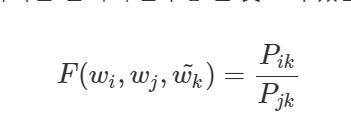




 ### 함수 F정리
 * F는 어떤 의미일까요? 마찬가지로 표를 기준으로 설명해드리면 P(solid
|ice)/P(solid
|steam)=8.9
가 될 겁니다. 그럼 위 식을 이렇게 예시로 풀 수 있겠네요. d
차원 벡터공간에 임베딩된 ice, steam, solid 벡터를 임의의 함수 F
에 넣으면 8.9를 반환하는 F
를 찾자는 겁니다.


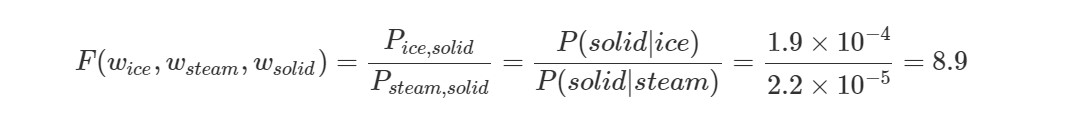

### 함수 F의 입력 가정
* 함수 F가 무엇인지 찾아야 함
먼저 wi와 wj 의 차이가 함수 F의 입력으로 사용한다고 가정


![가정](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbhystQ%2FbtqDrlm7qTM%2FK4UcEUPJKOyRVnCIhKB241%2Fimg.png)

F안에 집어넣을 wi, wj, wk 간에 관계를 따져보기 위해 wi 와 wj를 뺀 벡터에 wk
를 내적한다

> 임베딩된 두 단어 벡터의 내적은 전체 말뭉치의 동시등장확률이 되도록 하려는 목정이 있었서 Pik를 F(WTiWk)
 로 정의

 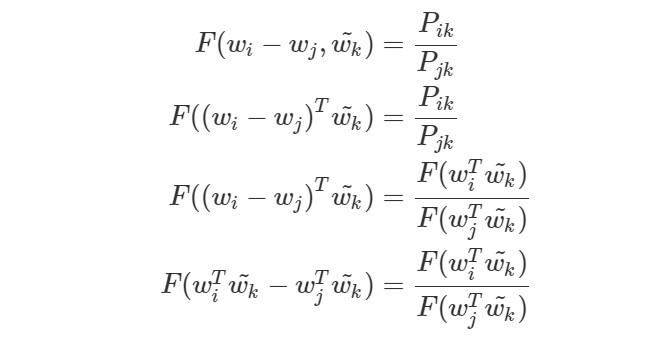

위에 함수 F가 만족해야할 조건
* 중심 단어와 주변 단어에는 모든 단어가 올수 있으므로 서로 변동이 가능해야한다
* 말뭉치 전체에서 구한 co-occurrence matrix X는 대칭행렬이여야 한다
* hommomorphism조건을 만족해야한다
  * 정리 a와b에 대해서 함수 F가 F(a+b)가 F(a)F(b)와 같도록 만족해야한다

![조건 3가지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FpQGUm%2FbtqDrkBEUji%2F3b7x5OS3CbDdFk2vOo1YOK%2Fimg.png)


# 함수 F에 대해 지수함수 검증
* F를 exp로 치환후에 식을 정리

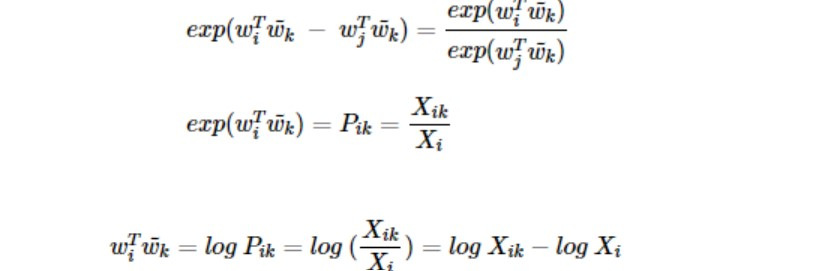

### 오류

* 함수 F의 3가지 조건중에 Wi, Wk의 순서가 바뀌어도 식이 성립되어야 한다.이 조건을 만족하려면 식이 log(Pik)가 log(PKi)와 같아야한다
  * 풀어서 정의 한다면

> log(Pik) = log(Xik)−log(Xi)

> log(Pki) = log(Xki)−log(Xk)

> log(Xi)와 log(Xk)가 다르다

### 해결
* 상수항 (bi, bk)적용

log(Xi)이 부분을 아래와 같이 상수항(bi, bk)으로 처리해 이 조건을 만족하도록 식을 한번 더 변환하였습니다.


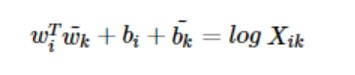

### 손실함수

좌변의 항 (임베딩 된 "중심단어(i) 벡터와 주변단어(k) 벡터의 내적")은

우변의 값 ("동시 등장 확률")과의 차이를 최소화하는 방향으로 학습을 시켜야 한다.

그리하여 아래와 같은 손실함수 식 도출

![손실함수](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FyqC3y%2FbtqDr97KlMM%2FpeVnGpmERVd3EpkKvvhKi0%2Fimg.png)

### 손실함수 문제점

![손실함수](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FyqC3y%2FbtqDr97KlMM%2FpeVnGpmERVd3EpkKvvhKi0%2Fimg.png)

* 문제점 발견 : log Xik 에서 Xik 값이 0이 될 수도 있음.

  * 해결책 : log Xik 를 log (1 + Xik)로 변경

* 문제점 발견 : 동시 등장 행렬 X가 Sparse Matrix일 가능성 큼
이처럼 빈도수가 낮은 값들이 많이 분포된 경우 정보에 도움을 주지 않음

  * 해결책 : 가중치 함수 적용 f(Xik)

![손실함수최종](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FpveyR%2FbtqDvYXTlpd%2F3ERZFm5UoKLRkxVOW4JKlK%2Fimg.png)